<a href="https://colab.research.google.com/github/REBEISamy/hello-galaxy/blob/main/Titatnic_EDA%2BLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/titanic-passengers (2).csv",sep = ";")
print(df)

     PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0            343       No       2  ...  13.0000    NaN         S
1             76       No       3  ...   7.6500  F G73         S
2            641       No       3  ...   7.8542    NaN         S
3            568       No       3  ...  21.0750    NaN         S
4            672       No       1  ...  52.0000    B71         S
..           ...      ...     ...  ...      ...    ...       ...
886           10      Yes       2  ...  30.0708    NaN         C
887           61       No       3  ...   7.2292    NaN         C
888          535       No       3  ...   8.6625    NaN         S
889          102       No       3  ...   7.8958    NaN         S
890          428      Yes       2  ...  26.0000    NaN         S

[891 rows x 12 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


### Les valeurs manquante

In [ ]:
df.isnull

<bound method DataFrame.isnull of      PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0            343       No       2  ...  13.0000    NaN         S
1             76       No       3  ...   7.6500  F G73         S
2            641       No       3  ...   7.8542    NaN         S
3            568       No       3  ...  21.0750    NaN         S
4            672       No       1  ...  52.0000    B71         S
..           ...      ...     ...  ...      ...    ...       ...
886           10      Yes       2  ...  30.0708    NaN         C
887           61       No       3  ...   7.2292    NaN         C
888          535       No       3  ...   8.6625    NaN         S
889          102       No       3  ...   7.8958    NaN         S
890          428      Yes       2  ...  26.0000    NaN         S

[891 rows x 12 columns]>

In [ ]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Remplacement des valeurs manquante

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
print(df["Cabin"].value_counts())

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
D              3
              ..
T              1
A23            1
C82            1
F G63          1
B3             1
Name: Cabin, Length: 147, dtype: int64


In [ ]:
df["Cabin"].fillna('G6',inplace=True)

In [ ]:
print(df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
df["Embarked"].fillna('S',inplace=True)

### Categorical to Numerical

In [ ]:
df['Survived']= df['Survived'].map({'Yes':1,'No':0})

In [ ]:
pd.isnull(df).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,G6,S


### Correlation

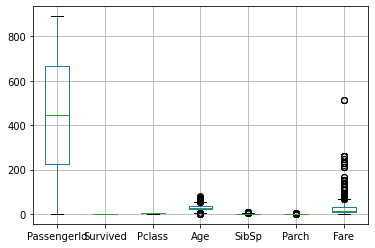

In [ ]:
df.boxplot()

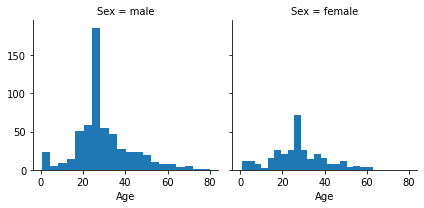

In [ ]:
g= sns.FacetGrid(df,col='Sex')
g.map(plt.hist,'Age',bins=20)

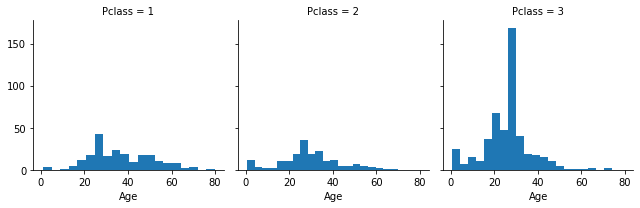

In [ ]:
g= sns.FacetGrid(df,col='Pclass')
g.map(plt.hist,'Age',bins=20)

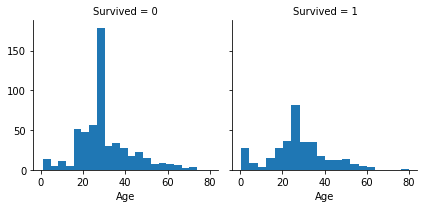

In [ ]:
g= sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'Age',bins=20)

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

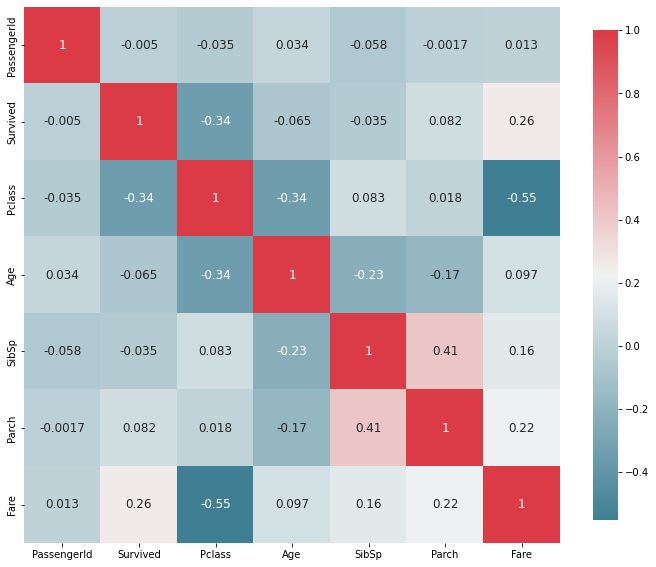

In [ ]:
plot_correlation_map( df )

In [ ]:
cleanup={"Pclass":{1:"first",2:"second",3:"third"}} 
df.replace(cleanup, inplace=True)
df[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean()

,Survived
Pclass,
first,0.629630
second,0.472826
third,0.242363


### Suppression des cologne inutile

In [ ]:
df["Title"] = df.Name.str.extract("([A-Za-z]+)\.", expand=False)
cols = ['Ticket', 'Cabin', 'Name']
df = df.drop(cols, axis=1)

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,343,0,second,male,28.0,0,0,13.0000,S,Mr
1,76,0,third,male,25.0,0,0,7.6500,S,Mr
2,641,0,third,male,20.0,0,0,7.8542,S,Mr
3,568,0,third,female,29.0,0,4,21.0750,S,Mrs
4,672,0,first,male,31.0,1,0,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,10,1,second,female,14.0,1,0,30.0708,C,Mrs
887,61,0,third,male,22.0,0,0,7.2292,C,Mr
888,535,0,third,female,30.0,0,0,8.6625,S,Miss
889,102,0,third,male,28.0,0,0,7.8958,S,Mr


In [ ]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }


In [ ]:
def get_titles():
    # we extract the title from each name
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    df['Title'] = df.Title.map(Title_Dictionary)
    return df

In [ ]:
df[df['Title'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


### Correlation

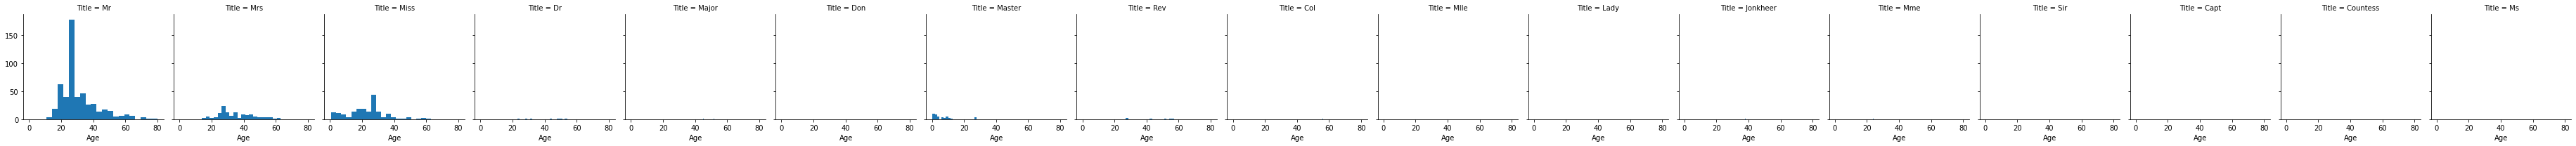

In [ ]:
g=sns.FacetGrid(df,col="Title")
g.map(plt.hist,"Age",bins=20)

### utilisation des fonctionnalites Parch et SibSp

In [ ]:
df["FamilySize"]=df['Parch'] +df['SibSp']
df.drop(["SibSp","Parch"],axis=1,inplace=True)
                         
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,343,0,second,male,28.0,13.0000,S,Mr,0
1,76,0,third,male,25.0,7.6500,S,Mr,0
2,641,0,third,male,20.0,7.8542,S,Mr,0
3,568,0,third,female,29.0,21.0750,S,Mrs,4
4,672,0,first,male,31.0,52.0000,S,Mr,1


In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,343,0,second,male,28.0,13.0000,S,Mr,0
1,76,0,third,male,25.0,7.6500,S,Mr,0
2,641,0,third,male,20.0,7.8542,S,Mr,0
3,568,0,third,female,29.0,21.0750,S,Mrs,4
4,672,0,first,male,31.0,52.0000,S,Mr,1
...,...,...,...,...,...,...,...,...,...
886,10,1,second,female,14.0,30.0708,C,Mrs,1
887,61,0,third,male,22.0,7.2292,C,Mr,0
888,535,0,third,female,30.0,8.6625,S,Miss,0
889,102,0,third,male,28.0,7.8958,S,Mr,0


In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:

#features extraction
df['Sex']= df['Sex'].map({'male':1,'female':0})
x = df[['Sex']]
y = df['Survived']

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


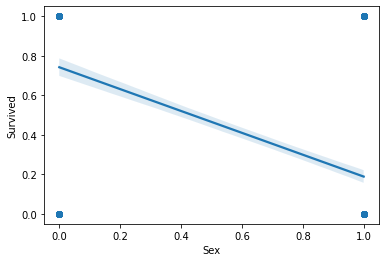

In [ ]:
sns.regplot(x='Sex',y='Survived',data=df)

In [ ]:
from sklearn.metrics import confusion_matrix

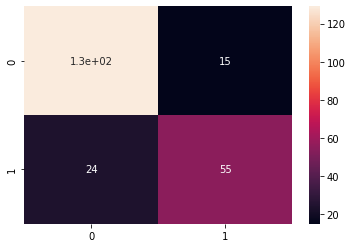

In [ ]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True)